In [369]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
from scipy.optimize import curve_fit
from scipy.constants import Boltzmann
from scipy.constants import e
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)
path = "C:/Users/Thomas/Laboratorio_Intermedio/Muon Physics/Data/"

In [344]:
def exponential_fit(M, a, b, c):
    return a*np.e**(-b*M) + c

def partialexponential_fit(M, a, b):
    return a*np.e**(-b*M)

def linear(M, A, B):
    return A*M + B

def Rho(TauObs, TauPlus, TauMinus):
    return (TauPlus*TauMinus - TauPlus*TauObs)/(TauMinus*(TauObs - TauPlus))

def Error(value, uncertainty):
    true_unc = float('%.*g' % (1, uncertainty))
    if "e" in str(uncertainty):
        ward = int(str(uncertainty)[-2:])
    else:
        ward = str(true_unc)[::-1].find('.')
    true_value = round(value, ward)
    return true_value, true_unc

> ## Bitácora - Experimento de Física de Muones

**Hecho por:** Simón Felipe Jimenez Botero & Thomas Andrade Hernández.

---

En el presente documento se encuentran desglozados los resultados de las mediciones asociadas al montaje experimental de Física de Muones. A lo largo de este código se podrán observar los resultados de cada medición, gráficas e información relacionada a cada una de las regresiones que se realicen, sumado a una breve explicación previa acerca de aquello que estamos haciendo, cómo lo estamos haciendo y alguna que otra cosa a tener presente para su replicación.

---

> **Montaje Experimental:**

Las mediciones que fueron realizadas a lo largo de las horas de laboratorio son derivadas del siguiente montaje experimental:

**Imagen del montaje entero:**
![Muon_Machine.jpg](Images/Muon_Machine.jpg)

Se logran apreciar la serie de instrumentos utilizados:

**(1)** Generador de Ondas con el que se realiza la caracterización tanto del amplificador como discriminador.

**(2) Detector principal de muones:** Se encuentra compuesto por el centellador plástico cilíndrico que se ve en el exterior, junto con un tubo fotomultiplicador interno que detecta la luz generada por las placas que son sensibles al decaimiento de las partículas.

**(3)** Osciloscopio encargado de medir las señales emitidas tanto por el generador de señales, el módulo de amplificación y discriminación, y el tubo fotomultiplicador.

**(4) Módulo de Amplificación y Discriminación:** Módulo esencial que permite amplificar y discriminar, mediante un *threshold* de entre $0$ y $0.5$ V.

**(5)** Computadora con el programa que permite contabilizar las mediciones de muones.

**(6)** Multímetros para medir el Alto Voltaje del detector principal de muones y el *threshold* del módulo de amplificación y discriminación.

---

> ## Mediciones e Información Importante:

A continuación se mostrarán tres conjuntos de datos tomados con diferentes tiempos y valores de alto voltaje y threshold. Los valores se encuentran representados con tres colores diferentes. La descripción de cada conjunto de datos y condiciones iniciales es:

Para los datos en azul: Duración aproximada de $18$ horas y $40$ minutos:

$$V^{HV}_{1} = 822 V \quad \text{ y } \quad V^{THR}_{1} = 0.135 V$$


Para los datos en amarillo: Duración aproximada de $66$ horas y $50$ minutos:

$$V^{HV}_{2} = 825 V \quad \text{ y } \quad V^{THR}_{2} = 0.180 V$$

Para los datos en rojo: Duración aproximada de $96$ horas:

$$V^{HV}_{3} = 887 V \quad \text{ y } \quad V^{THR}_{3} = 0.231 V$$

---

> ## Análisis de los datos:

En las siguientes líneas de código se mostrará un análisis estadístico del comportamiento de los datos recopilados:

In [345]:
FPack = "First D_Pack.txt"
SPack = "Second D_Pack.txt"
TPack = "Third D_Pack.txt"

first_pack = pd.read_csv(path + FPack, sep = " ")
second_pack = pd.read_csv(path + SPack, sep = " ")
third_pack = pd.read_csv(path + TPack, sep = " ")

In [346]:
r = 20000
Ffilter = first_pack["muon"] < r
Sfilter = second_pack["muon"] < r
Tfilter = third_pack["muon"] < r

El parámetro $r$ del anterior recuadro determina el valor límite que se escogerá para filtrar los datos. Como se podrá ver más adelante, al considerar la restricción en el límite de $r = 20000$, eliminando cualquier posible dato de ruido que haya medido el tubo fotomultiplicador, sucede un comportamiento extraño con los residuos.

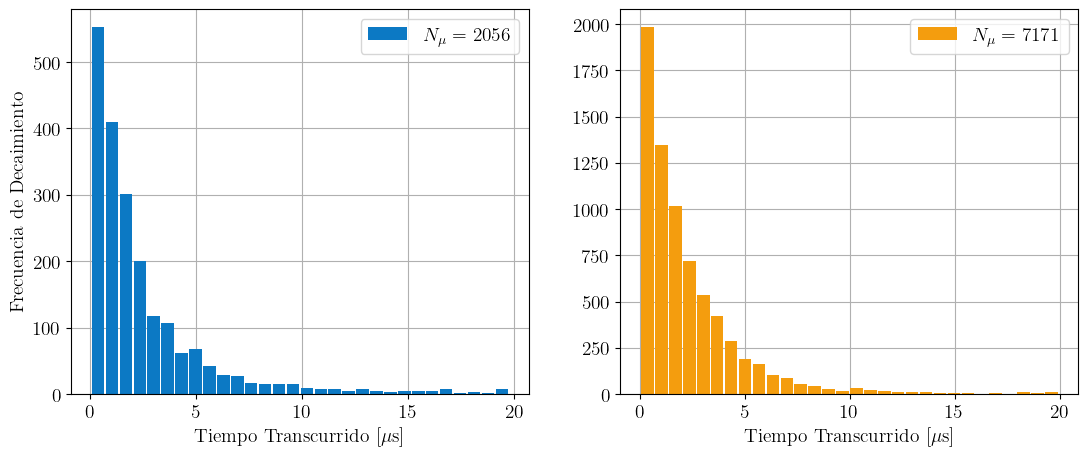

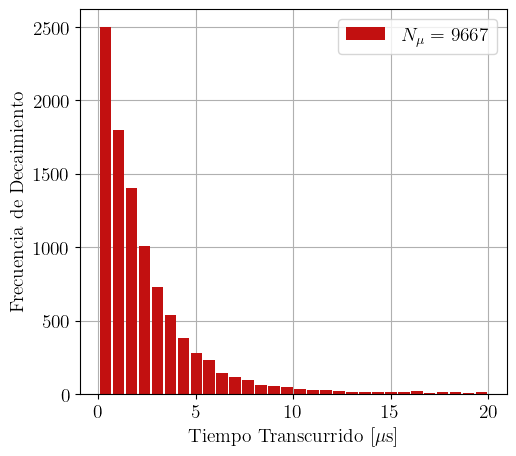

In [347]:
figure, axis = plt.subplots(1, 2, figsize = (13, 5))

bin = 30

Ffiltered_data = first_pack[Ffilter]
Fmuon_time = Ffiltered_data["muon"]/1000
axis[0].hist(Fmuon_time, bins = bin, zorder=2, rwidth=0.9, color = "#0C79C4", label = "$N_{\mu} =$ " + str(len(Ffiltered_data)))
axis[0].set_ylabel("Frecuencia de Decaimiento")
axis[0].set_xlabel("Tiempo Transcurrido [$\mu$s]")
axis[0].grid(True)
axis[0].legend()
Ffrequency, Fnumb = np.histogram(Fmuon_time, bins = bin)

Sfiltered_data = second_pack[Sfilter]
Smuon_time = Sfiltered_data["muon"]/1000
axis[1].hist(Smuon_time, bins = bin, zorder=2, rwidth=0.9, color = "#F49D0E", label = "$N_{\mu} =$ " + str(len(Sfiltered_data)))
axis[1].set_xlabel("Tiempo Transcurrido [$\mu$s]")
axis[1].grid(True)
axis[1].legend()
Sfrequency, Snumb = np.histogram(Smuon_time, bins = bin)

plt.show()

figure, axis = plt.subplots(1, 1, figsize = (5.5, 5))

Tfiltered_data = third_pack[Tfilter]
Tmuon_time = Tfiltered_data["muon"]/1000
axis.hist(Tmuon_time, bins = bin, zorder=2, rwidth=0.9, color = "#C21010", label = "$N_{\mu} =$ " + str(len(Tfiltered_data)))
axis.set_xlabel("Tiempo Transcurrido [$\mu$s]")
axis.set_ylabel("Frecuencia de Decaimiento")
axis.grid(True)
axis.legend()
Tfrequency, Tnumb = np.histogram(Tmuon_time, bins = bin)

plt.show()

El anterior conjunto de gráficas muestra los histogramas asociados a cada conjunto de datos. Se logra apreciar un comportamiento extraño para valores pertenecientes al intervalo $(10, 20)$ microsegundos, donde existen muy pocos datos en comparación a los más frecuentes, además de presentar un comportamiento posiblemente asociado a errores sistemáticos relacionados con el detector, los llamados "falsos positivos".

In [336]:
Finitial = len(Fmuon_time)
Ft = np.linspace(0, r/1000, 100)
Ft_ = np.linspace(0, r/1000, bin + 1)
Fmuons = np.array([Finitial])
for i in range(0, len(Ffrequency)):
    Fmuons = np.append(Fmuons, Fmuons[i] - Ffrequency[i])
    
Fcoeff, Fcov = curve_fit(exponential_fit, Ft_, Fmuons)
FResidues = Fmuons - exponential_fit(Ft_, *Fcoeff)

Sinitial = len(Smuon_time)
St = np.linspace(0, r/1000, 100)
St_ = np.linspace(0, r/1000, bin + 1)
Smuons = np.array([Sinitial])
for i in range(0, len(Sfrequency)):
    Smuons = np.append(Smuons, Smuons[i] - Sfrequency[i])
    
Scoeff, Scov = curve_fit(exponential_fit, St_, Smuons)
SResidues = Smuons - exponential_fit(St_, *Scoeff)

Tinitial = len(Tmuon_time)
Tt = np.linspace(0, r/1000, 100)
Tt_ = np.linspace(0, r/1000, bin + 1)
Tmuons = np.array([Tinitial])
for i in range(0, len(Tfrequency)):
    Tmuons = np.append(Tmuons, Tmuons[i] - Tfrequency[i])
    
Tcoeff, Tcov = curve_fit(exponential_fit, Tt_, Tmuons)
TResidues = Tmuons - exponential_fit(Tt_, *Tcoeff)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_10112\1042503628.py:2: RuntimeWarning: overflow encountered in power
  return a*np.e**(-b*M) + c


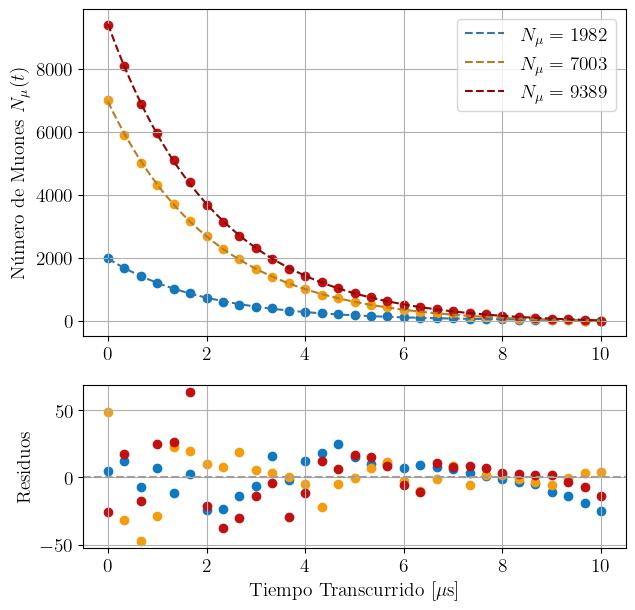

In [337]:
figure, axis = plt.subplots(2, 1, figsize = (7, 7), gridspec_kw={'height_ratios': [2, 1]})

axis[0].scatter(Ft_, Fmuons, color = "#0C79C4")
axis[0].plot(Ft, exponential_fit(Ft, *Fcoeff), linestyle = "--", color = "#3875A0", label = "$N_{\mu} =$ " + str(len(Ffiltered_data)))
axis[0].grid(True)

axis[0].scatter(St_, Smuons, color = "#F49D0E")
axis[0].plot(St, exponential_fit(St, *Scoeff), linestyle = "--", color = "#B27E29", label = "$N_{\mu} =$ " + str(len(Sfiltered_data)))
axis[0].grid(True)

axis[0].scatter(Tt_, Tmuons, color = "#C21010")
axis[0].plot(Tt, exponential_fit(Tt, *Tcoeff), linestyle = "--", color = "#870808", label = "$N_{\mu} =$ " + str(len(Tfiltered_data)))
axis[0].grid(True)

axis[1].set_xlabel("Tiempo Transcurrido [$\mu$s]")
axis[0].set_ylabel("Número de Muones $N_{\mu}(t)$")
axis[1].set_ylabel("Residuos")
axis[0].legend()

axis[1].scatter(Ft_, FResidues, color = "#0C79C4")
axis[1].scatter(St_, SResidues, color = "#F49D0E")
axis[1].scatter(Tt_, TResidues, color = "#C21010")
axis[1].grid(True)

axis[1].axhline(y = 0, color = "#A19D98", linestyle = "--")

In [338]:
FAunc, FBunc, FCunc = np.sqrt(np.diag(Fcov))
FTau = 1/Fcoeff[1], FBunc
SAunc, SBunc, SCunc = np.sqrt(np.diag(Scov))
STau = 1/Scoeff[1], SBunc
TAunc, TBunc, TCunc = np.sqrt(np.diag(Tcov))
TTau = 1/Tcoeff[1], TBunc
FTau, STau, TTau

((2.001870078321609, 0.0055544592790256215),
 (2.131212079695792, 0.001930833474778404),
 (2.1770482915537954, 0.001649128109961452))

In [359]:
FTau_True = Error(*FTau)
STau_True = Error(*STau)
TTau_True = Error(*TTau)

Taus = [FTau_True, STau_True, TTau_True]
ward = 1

for i in Taus:
    print(r"El valor obtenido de la vida media del muón es de: {} ± {} μs., para el conjunto de datos #{}.".format(i[0], i[1], ward))
    ward += 1

El valor obtenido de la vida media del muón es de: 2.002 ± 0.006 μs., para el conjunto de datos #1.
El valor obtenido de la vida media del muón es de: 2.131 ± 0.002 μs., para el conjunto de datos #2.
El valor obtenido de la vida media del muón es de: 2.177 ± 0.002 μs., para el conjunto de datos #3.


Ahora, removiendo la radiación de fondo cósmico:

In [339]:
FCmuons = Fmuons - Fcoeff[2]
Fcoeff_, Fcov_ = curve_fit(partialexponential_fit, Ft_, FCmuons)
FAunc_, FBunc_, = np.sqrt(np.diag(Fcov_))
FCTau = 1/Fcoeff_[1], FBunc_
FCResidues = FCmuons - partialexponential_fit(Ft_, *Fcoeff_)

SCmuons = Smuons - Scoeff[2]
Scoeff_, Scov_ = curve_fit(partialexponential_fit, St_, SCmuons)
SAunc_, SBunc_, = np.sqrt(np.diag(Scov_))
SCTau = 1/Scoeff_[1], SBunc_
SCResidues = SCmuons - partialexponential_fit(St_, *Scoeff_)

TCmuons = Tmuons - Tcoeff[2]
Tcoeff_, Tcov_ = curve_fit(partialexponential_fit, Tt_, TCmuons)
TAunc_, TBunc_, = np.sqrt(np.diag(Tcov_))
TCTau = 1/Tcoeff_[1], TBunc_
TCResidues = TCmuons - partialexponential_fit(Tt_, *Tcoeff_)

FCTau, SCTau, TCTau

C:\Users\Thomas\AppData\Local\Temp\ipykernel_10112\1042503628.py:5: RuntimeWarning: overflow encountered in power
  return a*np.e**(-b*M)


((2.0018699363663885, 0.003647983065862062),
 (2.131212079081567, 0.001216684531296107),
 (2.1770482878570823, 0.0010238718414709112))

In [360]:
FCTau_True = Error(*FCTau)
SCTau_True = Error(*SCTau)
TCTau_True = Error(*TCTau)

CTaus = [FCTau_True, SCTau_True, TCTau_True]
Cward = 1

for i in CTaus:
    print(r"El valor obtenido de la vida media del muón es de: {} ± {} μs., para el conjunto de datos #{} ya habiendo removido la radiación de fondo cósmico.".format(i[0], i[1], Cward))
    Cward += 1

El valor obtenido de la vida media del muón es de: 2.002 ± 0.004 μs., para el conjunto de datos #1 ya habiendo removido la radiación de fondo cósmico.
El valor obtenido de la vida media del muón es de: 2.131 ± 0.001 μs., para el conjunto de datos #2 ya habiendo removido la radiación de fondo cósmico.
El valor obtenido de la vida media del muón es de: 2.177 ± 0.001 μs., para el conjunto de datos #3 ya habiendo removido la radiación de fondo cósmico.


Se puede observar que la variación generada al remover la radiación de fondo cósmico es prácticamente inexistente, a excepción de los cambios en la incertidumbre, muy seguramente por el cálculo realizado por el algoritmo de los mínimos cuadrados.

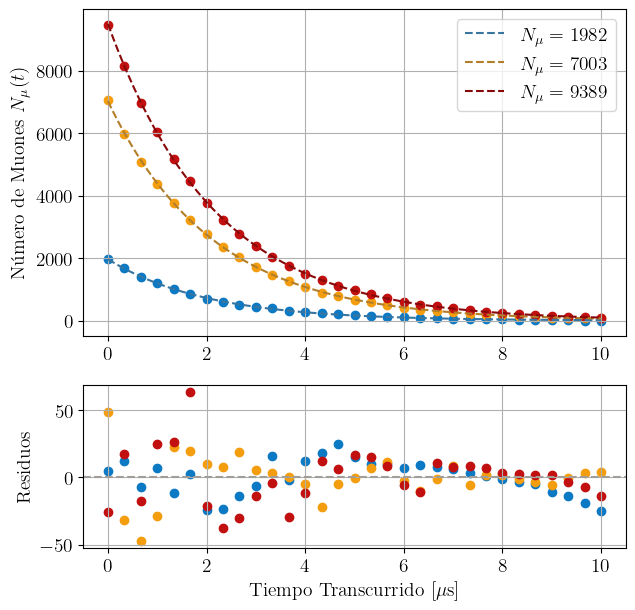

In [340]:
figure, axis = plt.subplots(2, 1, figsize = (7, 7), gridspec_kw={'height_ratios': [2, 1]})

axis[0].scatter(Ft_, FCmuons, color = "#0C79C4")
axis[0].plot(Ft, partialexponential_fit(Ft, *Fcoeff_), linestyle = "--", color = "#3875A0", label = "$N_{\mu} =$ " + str(len(Ffiltered_data)))
axis[0].grid(True)

axis[0].scatter(St_, SCmuons, color = "#F49D0E")
axis[0].plot(St, partialexponential_fit(St, *Scoeff_), linestyle = "--", color = "#B27E29", label = "$N_{\mu} =$ " + str(len(Sfiltered_data)))
axis[0].grid(True)

axis[0].scatter(Tt_, TCmuons, color = "#C21010")
axis[0].plot(Tt, partialexponential_fit(Tt, *Tcoeff_), linestyle = "--", color = "#870808", label = "$N_{\mu} =$ " + str(len(Tfiltered_data)))
axis[0].grid(True)

axis[1].set_xlabel("Tiempo Transcurrido [$\mu$s]")
axis[0].set_ylabel("Número de Muones $N_{\mu}(t)$")
axis[1].set_ylabel("Residuos")
axis[0].legend()

axis[1].scatter(Ft_, FCResidues, color = "#0C79C4")
axis[1].scatter(St_, SCResidues, color = "#F49D0E")
axis[1].scatter(Tt_, TCResidues, color = "#C21010")
axis[1].grid(True)

axis[1].axhline(y = 0, color = "#A19D98", linestyle = "--")

Ahora bien, a continuación se observa un proceso de linealización de los datos iniciales para poder obtener el mismo valor de la vida media del muón. El cálculo seguramente se encuentra errado dada la inmensa diferencia con el valor esperado, por tanto se deja meramente expresado como pequeña observación que potencialmente haga presencia en el informe final.

In [361]:
FLog = np.log(Fmuons[:-1]/Fcoeff[0])
FLcoeff, FLcov = curve_fit(linear, Ft_[:-1], FLog)
FLAunc, FLBunc, = np.sqrt(np.diag(FLcov))
FLTau = -1/FLcoeff[1], FLBunc
FLResidues = FLog - linear(Ft_[:-1], *FLcoeff)


SLog = np.log(Smuons[:-1]/Scoeff_[0])
SLcoeff, SLcov = curve_fit(linear, St_[:-1], SLog)
SLAunc, SLBunc, = np.sqrt(np.diag(SLcov))
SLTau = -1/SLcoeff[1], SLBunc
SLResidues = SLog - linear(St_[:-1], *SLcoeff)

TLog = np.log(Tmuons[:-1]/Tcoeff_[0])
TLcoeff, TLcov = curve_fit(linear, Tt_[:-1], TLog)
TLAunc, TLBunc, = np.sqrt(np.diag(TLcov))
TLTau = -1/TLcoeff[1], TLBunc
TLResidues = TLog - linear(Tt_[:-1], *TLcoeff)

FLTau, SLTau, TLTau

((-25.937410607367536, 0.058514136301816226),
 (-3.2302317006931927, 0.11464991399198142),
 (-4.712277837351996, 0.08472445486297348))

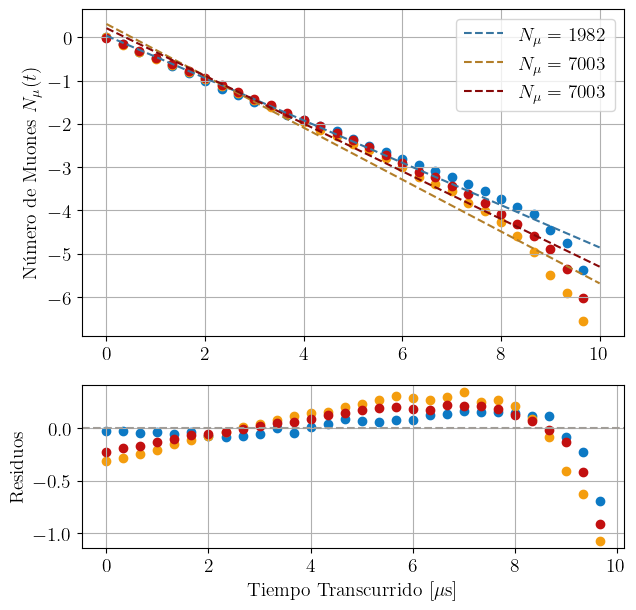

In [342]:
figure, axis = plt.subplots(2, 1, figsize = (7, 7), gridspec_kw={'height_ratios': [2, 1]})

axis[0].scatter(Ft_[:-1], FLog, color = "#0C79C4")
axis[0].plot(Ft, linear(Ft, *FLcoeff), linestyle = "--", color = "#3875A0", label = "$N_{\mu} =$ " + str(len(Ffiltered_data)))
axis[0].grid(True)

axis[0].scatter(St_[:-1], SLog, color = "#F49D0E")
axis[0].plot(St, linear(St, *SLcoeff), linestyle = "--", color = "#B27E29", label = "$N_{\mu} =$ " + str(len(Sfiltered_data)))
axis[0].grid(True)

axis[0].scatter(Tt_[:-1], TLog, color = "#C21010")
axis[0].plot(Tt, linear(Tt, *TLcoeff), linestyle = "--", color = "#870808", label = "$N_{\mu} =$ " + str(len(Sfiltered_data)))
axis[0].grid(True)

axis[1].set_xlabel("Tiempo Transcurrido [$\mu$s]")
axis[0].set_ylabel("Número de Muones $N_{\mu}(t)$")
axis[1].set_ylabel("Residuos")
axis[0].legend()

axis[1].scatter(Ft_[:-1], FLResidues, color = "#0C79C4")
axis[1].scatter(St_[:-1], SLResidues, color = "#F49D0E")
axis[1].scatter(Tt_[:-1], TLResidues, color = "#C21010")
axis[1].grid(True)

axis[1].axhline(y = 0, color = "#A19D98", linestyle = "--")

> ## Cálculo de la razón antimuón-muón:

Partiendo de los valores de la vida media observada obtenidos en la sección anterior, el cálculo relacionado con este cociente, para notar si existen más muones que antimuones (o viceversa) en nuestra muestra es:

In [362]:
def UncertRho(x, y, z, ux, uy, uz):
    a = (z/y)*(y - z)/((z - x)**2) * ux
    b = (x*z)/((y**2)*(x - z)) * uy
    c = (x/y)*(x - y)/(z - x)**2 * uz
    return np.sqrt(a**2 + b**2 + c**2)

In [363]:
PlusTau = 2.1969811
UncPlusTau = 0.000002
MinusTau =  2.043
UncMinusTau = 0.003

In [365]:
Rho(Taus[0][0], PlusTau, MinusTau), UncertRho(PlusTau, MinusTau, Taus[0][0], UncPlusTau, UncMinusTau, Taus[0][1])

(-0.22612537221823453, 0.03075427425380134)

In [368]:
Rho(Taus[1][0], PlusTau, MinusTau), UncertRho(PlusTau, MinusTau, Taus[1][0], UncPlusTau, UncMinusTau, Taus[1][1])

(1.4342375041343998, 0.09158480906562042)

In [367]:
Rho(Taus[2][0], PlusTau, MinusTau), UncertRho(PlusTau, MinusTau, Taus[2][0], UncPlusTau, UncMinusTau, Taus[2][1])

(7.211794769160169, 0.8471551888188958)

Como se logra apreciar para el primer conjunto de datos, el cociente es menor que 1, lo que implica que el número de muones es superior al de antimuones. Por otro lado, para el segundo y tercer conjunto de datos esta relación cambia, ahora hay más antimuones. Esta situación resulta algo contradictoria, por lo que se reservará la discusión para el informe.

> ## Constante de Coupling de Fermi:

Se realizaron cálculos preliminares para esta constante, no obstante, los valores obtenidos no son para nada congruentes con lo esperado a nivel teórico. Lo más probable es que sea consecuencia de un error propio al realizar los cálculos, por lo que se deja a desarrollar para el informe. Un código preliminar que permitiría calcular estas cantidades sería:

In [408]:
pi = np.pi
hbar = 1.054571817e-34 
c = 299792458 
tau_mu = Taus[0][0]
m_mu = 1.883531627e-28  
delta_tau_mu = Taus[0][1]
delta_m_mu = 0.0005e-28 

G_F_SI = np.sqrt((192 * pi**3 * hbar**7) / (tau_mu * m_mu**5 * c**4)) * 1/(hbar*c)**3
conversion_factor = 1/(1.602176634e-10)**2 

G_F_GeV = G_F_SI / conversion_factor 

delta_G_F_SI_reduced = G_F_SI * np.sqrt(
    (delta_tau_mu / (2 * tau_mu))**2 +
    (5 * delta_m_mu / (2 * m_mu))**2
)

delta_G_F_GeV_reduced = delta_G_F_SI_reduced / conversion_factor

print(f"Valor de G_F en GeV⁻²: {G_F_GeV:.5e}")
print(f"Incertidumbre de G_F en GeV⁻²: {delta_G_F_GeV_reduced:.5e}")


Valor de G_F en GeV⁻²: 1.21918e-08
Incertidumbre de G_F en GeV⁻²: 1.99809e-11


Es necesario hacer una revisión de esto, el valor de 1.85 es medianamente cercano a los 1.16 esperados, pero el orden de magnitud no es semejante.